# Loan Prediction and EDA

Data from:- https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/data

## 1. Importing Libraries

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data as DataFrame

In [398]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

## 3. Knowing the Data

### 3.1 - Columns

In [399]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 3.2 - Datatypes of Columns

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3.3 - Knowing basic Statistics of Data

In [401]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 3.4 - First five rows of Data

In [402]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3.5 - Shape of Data

In [403]:
df.shape

(614, 13)

## 4. Cleaning the Data

### 4.1 - Removing null values

In [404]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [405]:
df = df.dropna()

In [406]:
df.shape

(480, 13)

In [407]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 4.2 - Remove Duplicated values

In [408]:
df.duplicated().any()

False

### 4.3 - Removing Columns that we don't need
Loan_ID is a column that we don't need to  predict and keeping it might affect the accuracy of the model.

In [409]:
df=df.drop('Loan_ID',axis=1)

## 5. Visualizing the Data
Our Target variable is Status of Loan i.e. if the loan is approved or not, so we will visualize our data around it.

### 5.1 - Number of approvals for loans

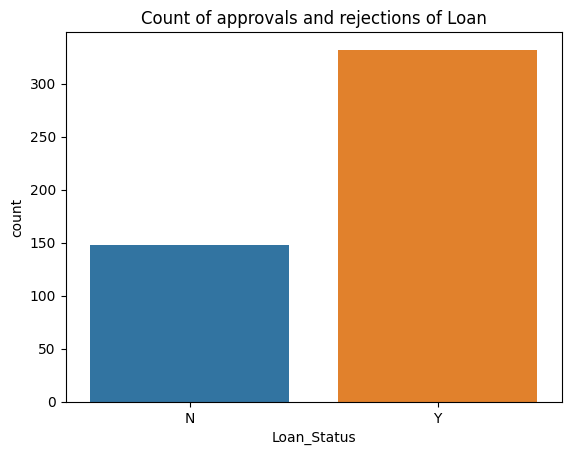

In [410]:
sns.countplot(df,x="Loan_Status")
plt.title("Count of approvals and rejections of Loan")
plt.show()

### 5.2 - Number of approvals for loans based on Gender of applicant

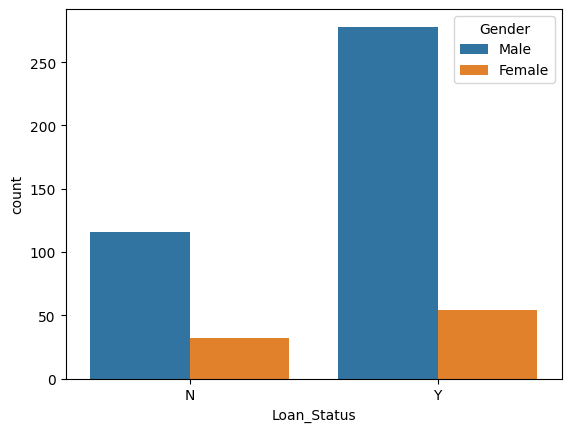

In [411]:
sns.countplot(df,x="Loan_Status",hue='Gender')
plt.show()

### 5.3 - Number of approvals for loans based on Marital Status of applicant

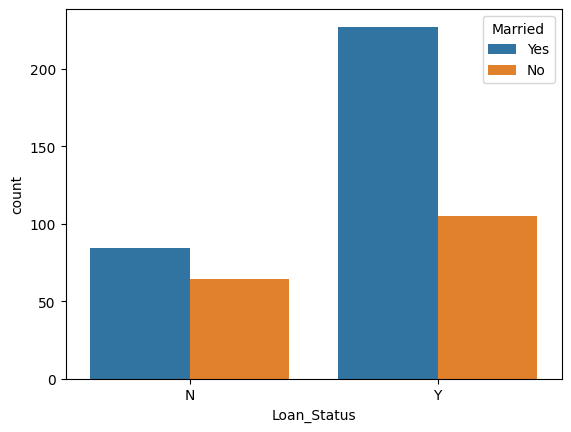

In [412]:
sns.countplot(df,x="Loan_Status",hue='Married')
plt.show()

### 5.4 - Number of approvals for loans based on how many people are dependent on applicant financially.

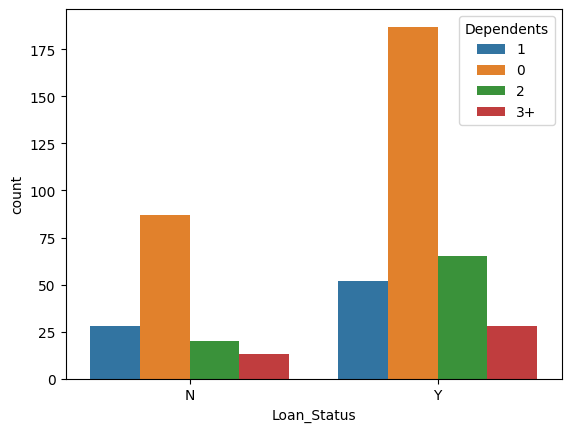

In [413]:
sns.countplot(df,x="Loan_Status",hue='Dependents')
plt.show()

### 5.5 - Number of approvals for loans based on applicant's education status

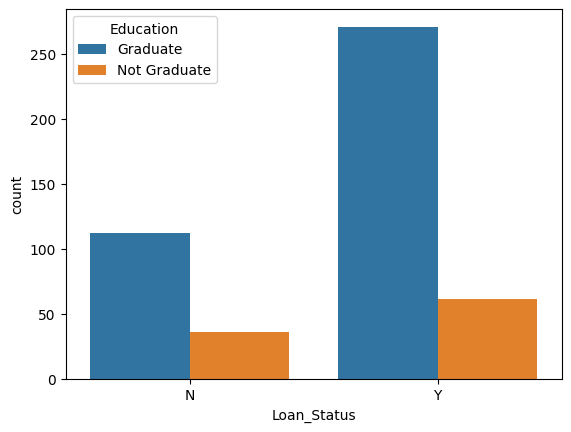

In [414]:
sns.countplot(df,x="Loan_Status",hue='Education')
plt.show()

### 5.6 - Number of approvals for loans based on applicant's employment status

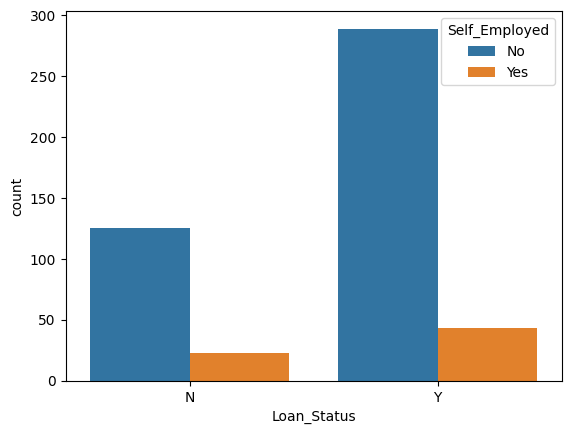

In [415]:
sns.countplot(df,x="Loan_Status",hue='Self_Employed')
plt.show()

### 5.6 - Number of approvals for loans based on applicant's Property Area

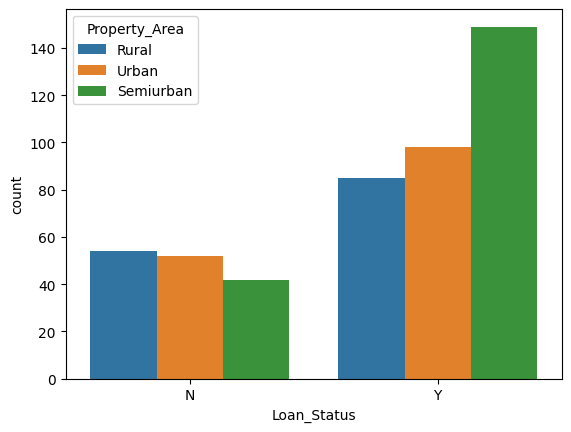

In [416]:
sns.countplot(df,x="Loan_Status",hue='Property_Area')
plt.show()

### 5.6 - Number of approvals for loans based on applicant's ask for loan

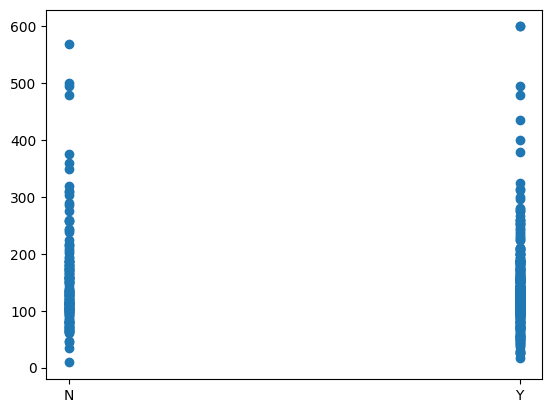

In [417]:
plt.scatter(df['Loan_Status'], df['LoanAmount'])
plt.show()


## 6. Preproceesing Data

### 6.1 - Changing values
The values in the columns that have categorical values, so it has to be converted into Ordinal values to train the machine.

#### 6.1.1 - Importing LabelEncoder

In [418]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

#### 6.1.2 - Changing Values

In [419]:
for i in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]:
    df[i]=label.fit_transform(df[i])

In [420]:
df.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


### 6.2 - Dividing the data for training and testing

#### 6.2.1 Seperating train and target values

In [421]:
target=df.Loan_Status

In [422]:
df=df.drop('Loan_Status',axis=1)

In [423]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


#### 6.2.2 Dividing data for training and testing

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=df
y=target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

## 7. Making model and checking accuracy

### 7.1 - Performing Logistic Regression

In [425]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [429]:
pred=reg.predict(x_test)
score=accuracy_score(pred,y_test)
print(score * 100,'%')

77.60416666666666 %


### 7.2 - Performing SVC (Support Vector Classification)

In [ ]:
from sklearn import svm
new=svm.SVC(kernel='linear')

In [ ]:
new.fit(x_train,y_train)

SVC(kernel='linear')

In [430]:
y_pred=new.predict(x_test)
score1=accuracy_score(y_pred,y_test)
print(score1 *100,'%')

76.04166666666666 %


Both the models have given an accuracy >75% which is good.